In [4]:
#import Python stuff
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ddir='' #your data directory, like '/Users/ayep/research/data'; starting with "/Users" makes code easily portable to other computers :)
pdir='' #your plot directory, like '/Users/ayep/research/plot'

def opendat(dir,filename): #dir,'filename'. For opening a data file. Can then send through roundtable.
    f=open(dir+filename,'r')
    dat=f.readlines()
    f.close()
    labels=dat[0][0:-1].split()
    dat2=[[a.strip('\n') for a in d.split('\t')] for d in dat if d[0]!='#']
    dat3=[['nan' if a.strip()=='' else a for a in d] for d in dat2]
    return [dat3,labels]
def opendat2(dirr,filename,params): #Use as var,var,var...=opendat2(dir,'filename',['keys']).
    dat,label=opendat(dirr,filename)  #Get keys by first leaving ['keys'] blank: opendat2(dirr,filename,[])
    print(label)
    varrs=[]
    for i in range(len(params)):
        j=label.index(params[i])
        try:
            var=np.array([float(d[j]) for d in dat]) #works for float.
            varrs.append(var)
        except ValueError:
            var=[d[j].strip() for d in dat] #works for strings.
            varrs.append(var)
    return varrs

def writedat(dirr,filename,label,pars): #.dat auto included. pars as [name,ra,dec] etc.
    datp=[[str(a[i]) for a in pars] for i in range(len(pars[0]))]
    f=open(dirr+filename+'.dat','w')
    print('\t'.join(label),file=f)
    print(label)
    for d in datp:
        print('\t'.join(d),file=f)
    f.close()
    print('It is written: '+filename+'.dat')
    
def erm(val,err): #list,list
    v=np.array(val)
    e=np.array(err)
    w=1.0/e**2.0
    avg=np.nansum(w*v)/np.nansum(w)
    avgerr=1.0/np.sqrt(np.nansum(w))
    return avg,avgerr

General plotting tip: You can get pretty named colors from https://python-graph-gallery.com/196-select-one-color-with-matplotlib/ and unnamed colors from https://htmlcolorcodes.com/.

In [6]:
#Load data

#UPK 535
ra535,dec535,p535,pra535,pdec535,rv535a,G535,B535,R535,spt535,d535,binf535=opendat2(ddir,'UPK535_combined.dat',['#ra', 'dec', 'p','pra','pdec', 'rv', 'G', 'B', 'R', 'spt','d','binaryflag'])
p535err,pra535err,pdec535err,rv535aerr,G535err,B535err,R535err,spt535err,d535perr,d535merr=opendat2(ddir,'UPK535_combined.dat',['perr','praerr','pdecerr', 'rverr', 'Gerr', 'Berr', 'Rerr', 'spterr','dp','dm'])
#clean rv for simulation: already threw out my rverr>10 but gotta check new Gaia rvs.
rv535aa=[rv535a[i] if rv535aerr[i]<10. else np.float('nan') for i in range(len(ra535))]
rv535aaerr=[rv535aerr[i] if rv535aerr[i]<10. else np.float('nan') for i in range(len(ra535))]
#neutralize all binaries.
bindev=5.
rv535med=np.nanmedian(rv535aa)
binn535=[binf535[i] if binf535[i]!='nan' else 'SB1?' if abs(rv535aa[i]-rv535med)>bindev else 'nan' for i in range(len(ra535))]
#calculate cluster rv from nonbinary rvs and replace all nans with cluster rv.
rv535aaa=[rv535aa[i] if 'SB' not in binn535[i] else np.float('nan') for i in range(len(ra535))]
rv535aaaerr=[rv535aaerr[i] if 'SB' not in binn535[i] else np.float('nan') for i in range(len(ra535))]
rvcl535,rvcl535err=erm(rv535aaa,rv535aaaerr)[0],np.nanstd(rv535aaa)
print('UPK535:',rvcl535,'+/-',rvcl535err)
#clean rv:
rv535=[rvcl535 if np.isnan(r) else r for r in rv535aaa]
rv535err=[rvcl535err if np.isnan(rv535aaa[i]) else rv535aaaerr[i] for i in range(len(ra535))]

#Theia 120
ra120,dec120,p120,pra120,pdec120,rv120a,G120,B120,R120,spt120,d120,binf120=opendat2(ddir,'Theia120_combined.dat',['#ra', 'dec', 'p','pra','pdec', 'rv', 'G', 'B', 'R', 'spt','d','binaryflag'])
p120err,pra120err,pdec120err,rv120aerr,G120err,B120err,R120err,spt120err,d120perr,d120merr=opendat2(ddir,'Theia120_combined.dat',['perr','praerr','pdecerr', 'rverr', 'Gerr', 'Berr', 'Rerr', 'spterr','dp','dm'])
BR120=np.array(B120)-np.array(R120)
BR120err=np.sqrt(np.array(B120)**2.+np.array(R120)**2.)
#clean rv for simulation: already threw out my rverr>10 but gotta check new Gaia rvs.
rv120aa=[rv120a[i] if rv120aerr[i]<10. else np.float('nan') for i in range(len(ra120))]
rv120aaerr=[rv120aerr[i] if rv120aerr[i]<10. else np.float('nan') for i in range(len(ra120))]
#neutralize all binaries.
bindev=5.
rv120med=np.nanmedian(rv120aa)
binn120=[binf120[i] if binf120[i]!='nan' else 'SB1?' if abs(rv120aa[i]-rv120med)>bindev else 'nan' for i in range(len(ra120))]
#calculate cluster rv from nonbinary rvs and replace all nans with cluster rv.
rv120aaa=[rv120aa[i] if 'SB' not in binn120[i] else np.float('nan') for i in range(len(ra120))]
rv120aaaerr=[rv120aaerr[i] if 'SB' not in binn120[i] else np.float('nan') for i in range(len(ra120))]
rvcl120,rvcl120err=erm(rv120aaa,rv120aaaerr)[0],np.nanstd(rv120aaa)
print('Theia120:',rvcl120,'+/-',rvcl120err)
#clean rv:
rv120=[rvcl120 if np.isnan(r) else r for r in rv120aaa]
rv120err=[rvcl120err if np.isnan(rv120aaa[i]) else rv120aaaerr[i] for i in range(len(ra120))]

['#ra', 'dec', 'p', 'perr', 'pra', 'praerr', 'pdec', 'pdecerr', 'rv', 'rverr', 'G', 'Gerr', 'B', 'Berr', 'R', 'Rerr', 'V', 'Verr', 'spt', 'spterr', 'binaryflag', 'd', 'dm', 'dp']
['#ra', 'dec', 'p', 'perr', 'pra', 'praerr', 'pdec', 'pdecerr', 'rv', 'rverr', 'G', 'Gerr', 'B', 'Berr', 'R', 'Rerr', 'V', 'Verr', 'spt', 'spterr', 'binaryflag', 'd', 'dm', 'dp']
UPK535: 10.149414529091349 +/- 1.5322115646924208
['#ra', 'dec', 'p', 'perr', 'pra', 'praerr', 'pdec', 'pdecerr', 'rv', 'rverr', 'G', 'Gerr', 'B', 'Berr', 'R', 'Rerr', 'V', 'Verr', 'spt', 'spterr', 'binaryflag', 'd', 'dm', 'dp']
['#ra', 'dec', 'p', 'perr', 'pra', 'praerr', 'pdec', 'pdecerr', 'rv', 'rverr', 'G', 'Gerr', 'B', 'Berr', 'R', 'Rerr', 'V', 'Verr', 'spt', 'spterr', 'binaryflag', 'd', 'dm', 'dp']
Theia120: 19.206145691070176 +/- 1.5132951173143845


8 9
16 17
9 10
12 13


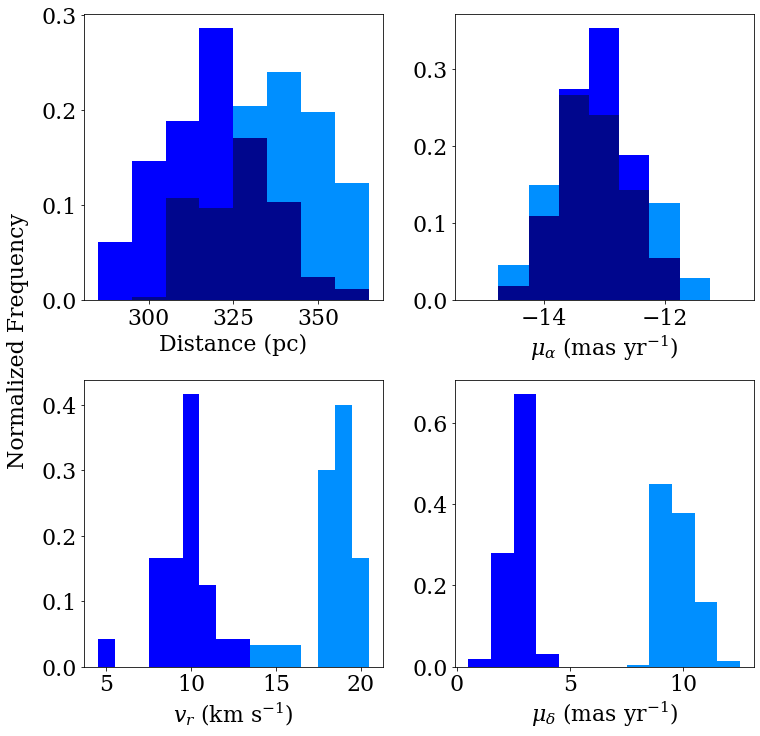

In [7]:
plt.rcParams.update({'font.size':22,'lines.linewidth':4, 'font.family':'serif','mathtext.fontset':'dejavuserif'})

# Histogram
f,((a11,a12),(a21,a22))=plt.subplots(2,2,figsize=(12,12),gridspec_kw = {'wspace':0.24,'hspace':0.28})
f.add_subplot(111, frameon=False,xticks=[],yticks=[]) #for tight layout

hpars1=[d535,[a for a in rv535aaa if np.isnan(a)==False],pra535,pdec535]
hpars2=[d120,[a for a in rv120aaa if np.isnan(a)==False],pra120,pdec120]
mins=[290,5,-15,1]
maxs=[380,22,-10,14]
ints=[10,1,0.5,1]
axs=[a11,a21,a12,a22]
labs=['Distance (pc)','$v_r$ (km s$^{-1}$)','$\mu_{\\alpha}$ (mas yr$^{-1}$)','$\mu_{\delta}$ (mas yr$^{-1}$)']
for i in range(4):
    par1=hpars1[i]
    par2=hpars2[i]
    minn=mins[i]
    maxx=maxs[i]
    intt=ints[i]
    ax=axs[i]
    beans=np.arange(minn,maxx,intt)
    h535,w535=np.histogram(par1,beans)
    h120,w120=np.histogram(par2,beans)
    #plt.figure(figsize=(10,10))
    print(len(h535),len(w535))
    ax.bar(w120[:-1],h120/len(par2),color='#008FFF',width=intt)
    ax.bar(w535[:-1],h535/len(par1),color='blue',width=intt)
    overlap=[np.min([h120[k]/len(par2),h535[k]/len(par1)]) for k in range(len(h120))]
    ax.bar(w120[:-1],overlap,color='#00068D',width=intt)
    ax.set_xlabel(labs[i])
plt.ylabel('Normalized Frequency\n\n')
plt.savefig(pdir+'CC_Histograms.png',bbox_inches='tight')

## Color-Mapping!

This basically gives you a 3rd dimension. Go wild! Color maps can be chosen from here: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

I personally like rainbow, warm, cool, and RdYlBu.

You can also use lists for sizes to give different sizes to each data point. :) That's yet another dimension you can use!

Be warned that the color bar can be a wily creature when you're adding it to plots with subplots. I often actually create a separate axis for it when that happens and calibrate its size by hand. D: With one plot though, it's easy. :)

Text(0, 0.5, 'Dec ($^{o}$)')

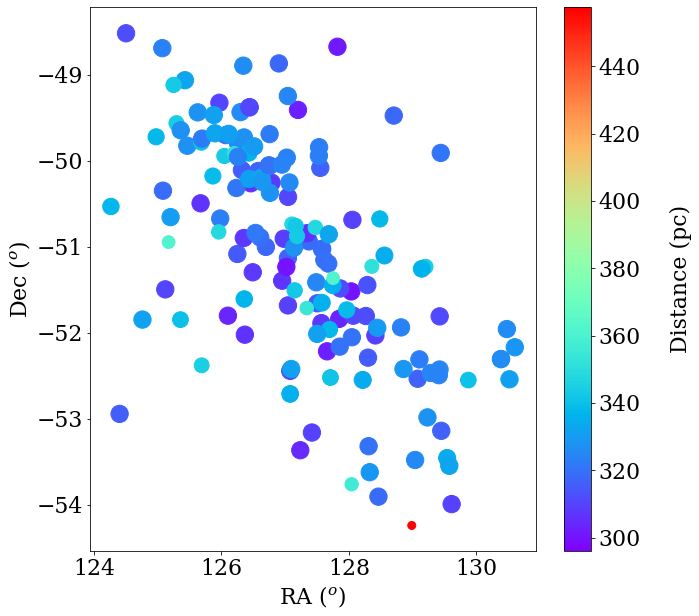

In [28]:
#3-D position with ra, dec, AND distance:

plt.rcParams.update({'font.size':22,'lines.linewidth':4, 'font.family':'serif','mathtext.fontset':'dejavuserif'})
f=plt.figure(figsize=(10,10))
cm=plt.scatter(ra535,dec535,c=d535,cmap='rainbow',s=[d if d<300 else 300 for d in 10000./(d535-300)])
cbar = f.colorbar(cm,label='\nDistance (pc)')
plt.xlabel('RA ($^{o}$)')
plt.ylabel('Dec ($^{o}$)')
